# This file contains lifted over cCRE annotations taken from SCREEN and lifted over with UCSC LIFTOVER WEB BROWSER - LETS SEE

Successfully loaded the CHM13 BED file.

CHM13 Chromosome Matches: 1061388
CHM13 Chromosome Mismatches (to be removed): 221
size of chm13 cCRE before filtering (1061609, 8)
size of chm13 cCRE after filtering (1061388, 8)
Successfully loaded the GRCh38 BED file.
size of grch38 original cCRE (1063878, 6)


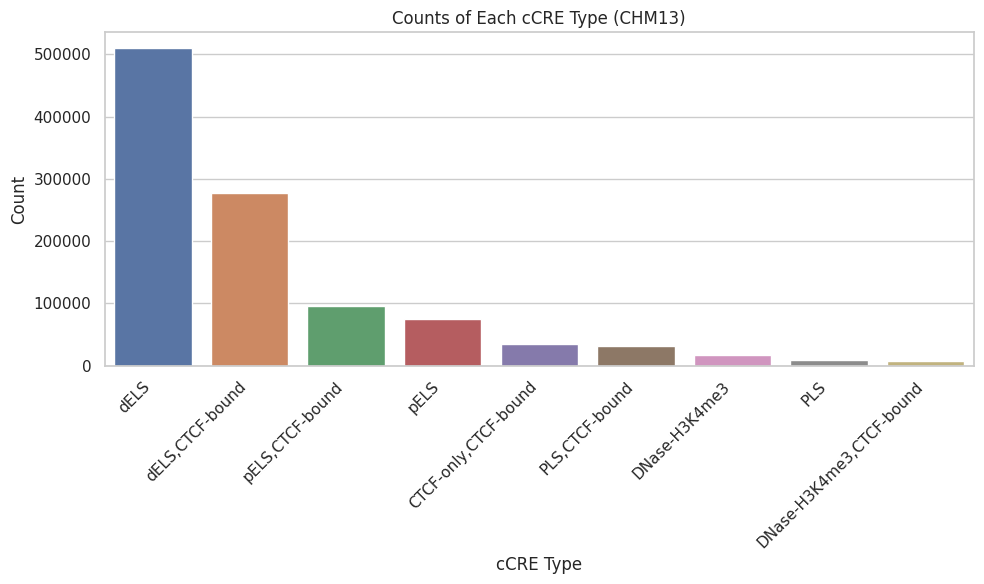

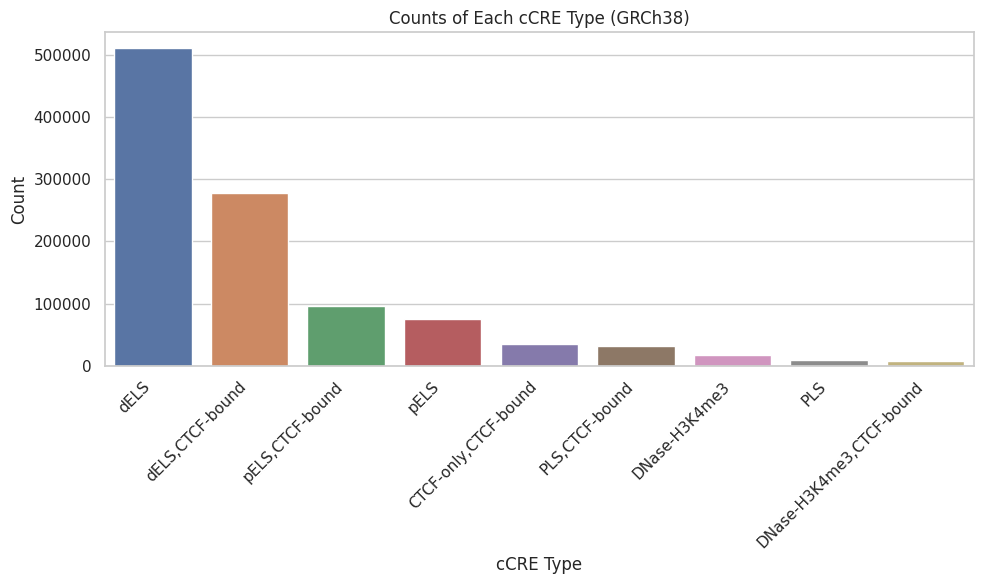

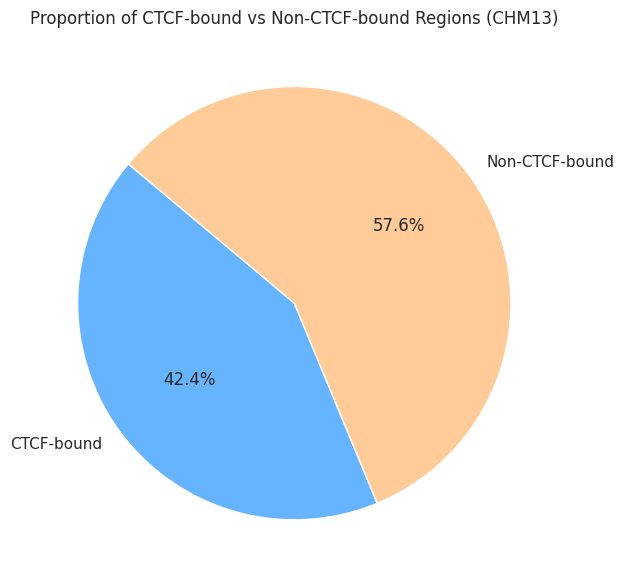

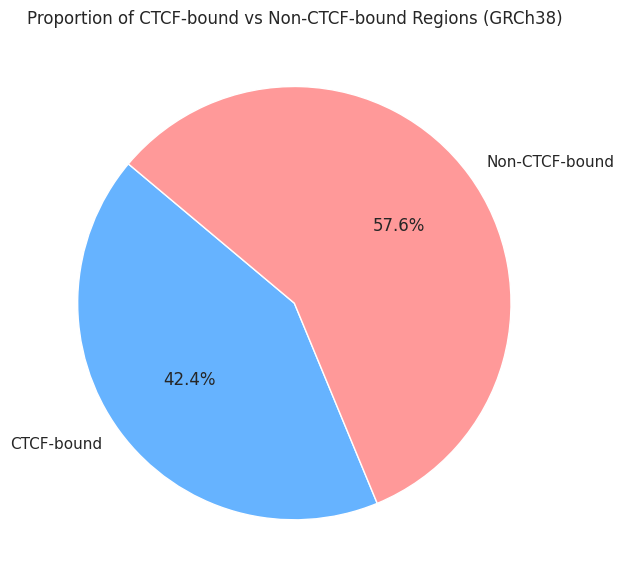

In [14]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 1. Load the CHM13 BED Data
# ==========================
CHM13_BED_FILE = '/home/alextu/scratch/hglft_genome_cCREs_chm13.bed'
columns_chm13 = ['chrom_chm13', 'start_chm13', 'end_chm13', 'hg38_info', 'score']

# Load the CHM13 file
try:
    df_chm13 = pd.read_csv(CHM13_BED_FILE, sep='\t', header=None, names=columns_chm13)
    print("Successfully loaded the CHM13 BED file.")
except Exception as e:
    print(f"Error loading CHM13 file: {e}")
    exit()

# ==========================
# 2. Extract hg38 Chromosome and cCRE Type
# ==========================
def extract_hg38_chrom(info):
    """Extract hg38 chromosome from hg38_info."""
    match = re.match(r'(chr[0-9XYM]+):', info)
    return match.group(1) if match else None

def extract_ccre_type(info):
    """Extract cCRE type (e.g., CTCF-bound, dELS) from hg38_info."""
    match = re.match(r'.*:(.*)', info)
    return match.group(1) if match else None

# Apply extraction functions
df_chm13['chrom_hg38'] = df_chm13['hg38_info'].apply(extract_hg38_chrom)
df_chm13['ccre_type'] = df_chm13['hg38_info'].apply(extract_ccre_type)

# Drop invalid rows
df_chm13.dropna(subset=['chrom_hg38', 'ccre_type'], inplace=True)

# Check for chromosome matches
df_chm13['chrom_match'] = df_chm13['chrom_chm13'] == df_chm13['chrom_hg38']

# Count mismatches
chm13_mismatch_count = len(df_chm13[~df_chm13['chrom_match']])
chm13_match_count = len(df_chm13[df_chm13['chrom_match']])


print(f"\nCHM13 Chromosome Matches: {chm13_match_count}")
print(f"CHM13 Chromosome Mismatches (to be removed): {chm13_mismatch_count}")
print("size of chm13 cCRE before filtering", df_chm13.shape)

# Keep only matching rows
df_chm13 = df_chm13[df_chm13['chrom_match']]

print("size of chm13 cCRE after filtering", df_chm13.shape)
# ==========================
# 3. Process the GRCh38 BED Data
# ==========================
GRCh38_BED_FILE = '/home/alextu/scratch/GRCh38-cCREs.bed'
columns_grch38 = ['chrom_hg38', 'start_hg38', 'end_hg38', 'EH_code', 'EH_group', 'ccre_type']

# Load the GRCh38 file
try:
    df_grch38 = pd.read_csv(GRCh38_BED_FILE, sep='\t', header=None, names=columns_grch38)
    print("Successfully loaded the GRCh38 BED file.")
except Exception as e:
    print(f"Error loading GRCh38 file: {e}")
    exit()

print("size of grch38 original cCRE", df_grch38.shape)
# ==========================
# 4. Calculate Metrics
# ==========================
# CHM13 metrics
chm13_ctcf_count = df_chm13['ccre_type'].str.contains('CTCF-bound').sum()
chm13_total = len(df_chm13)
chm13_non_ctcf = chm13_total - chm13_ctcf_count
chm13_ccre_counts = df_chm13['ccre_type'].value_counts()

# GRCh38 metrics
grch38_ctcf_count = df_grch38['ccre_type'].str.contains('CTCF-bound').sum()
grch38_total = len(df_grch38)
grch38_non_ctcf = grch38_total - grch38_ctcf_count
grch38_ccre_counts = df_grch38['ccre_type'].value_counts()

# ==========================
# 5. Visualize Results
# ==========================
sns.set(style="whitegrid")

# Bar plot: cCRE types for CHM13
plt.figure(figsize=(10, 6))
sns.barplot(
    x=chm13_ccre_counts.index,
    y=chm13_ccre_counts.values,
    hue=chm13_ccre_counts.index,  # Explicitly assign x to hue
    dodge=False,                  # Avoid adding a legend
    legend=False                  # Disable legend
)
plt.title('Counts of Each cCRE Type (CHM13)')
plt.xlabel('cCRE Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar plot: cCRE types for GRCh38
plt.figure(figsize=(10, 6))
sns.barplot(
    x=grch38_ccre_counts.index,
    y=grch38_ccre_counts.values,
    hue=grch38_ccre_counts.index,  # Explicitly assign x to hue
    dodge=False,                   # Avoid adding a legend
    legend=False                   # Disable legend
)
plt.title('Counts of Each cCRE Type (GRCh38)')
plt.xlabel('cCRE Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart: CTCF-bound vs Non-CTCF-bound for CHM13
plt.figure(figsize=(8, 6))
plt.pie(
    [chm13_ctcf_count, chm13_non_ctcf],
    labels=['CTCF-bound', 'Non-CTCF-bound'],
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ffcc99'],
    startangle=140
)
plt.title('Proportion of CTCF-bound vs Non-CTCF-bound Regions (CHM13)')
plt.tight_layout()
plt.show()

# Pie chart: CTCF-bound vs Non-CTCF-bound for GRCh38
plt.figure(figsize=(8, 6))
plt.pie(
    [grch38_ctcf_count, grch38_non_ctcf],
    labels=['CTCF-bound', 'Non-CTCF-bound'],
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=140
)
plt.title('Proportion of CTCF-bound vs Non-CTCF-bound Regions (GRCh38)')
plt.tight_layout()
plt.show()

In [ ]:
CHM13 Chromosome Matches: 1061388
CHM13 Chromosome Mismatches (to be removed): 221
Successfully loaded the GRCh38 BED file.
size of grch38 original cCRE (1063878, 6)

In [13]:
1061388 + 221

1061609